In [66]:
import qcodes as qc
from qcodes.instrument_drivers.stanford_research.SR865A import SR865A
import numpy as np
from time import sleep

import sweep 
from sweep.sweep_load import pload1d
from barreralabdrivers.utils.param_utils import paramp
from cappy.config import term4config, data4path
from cappy.balancer import Balancer

from qcodes.validators import Numbers, Callable, Validator
from qcodes.parameters import Parameter, ScaledParameter
import datetime

In [67]:
import pyvisa 
rm = pyvisa.ResourceManager()
rm.list_resources()

('TCPIP0::169.254.169.3::inst0::INSTR',
 'ASRL1::INSTR',
 'ASRL3::INSTR',
 'ASRL4::INSTR',
 'ASRL6::INSTR',
 'GPIB0::15::INSTR')

In [68]:
qc.Instrument.close_all()   # in case of existing connecitons
container = qc.Station(config_file=str(term4config))

# acdac = container.load_instrument("acdac")
# dcdac = container.load_instrument("dcdac")

yoko = container.load_instrument("yoko")
keith2400 = container.load_instrument("keithley2400")
keith6500 = container.load_instrument("keithley6500")
li = container.load_instrument("lockin")

print(100 * "-")
print(f"{datetime.datetime.now().strftime('%c')}")

Connected to: YOKOGAWA 765611 (serial:90ZC43353, firmware:1.10) in 0.03s
Connected to: KEITHLEY INSTRUMENTS INC. 2400 (serial:4571245, firmware:D02 Jan 20 2021 10:18:49/B01  /W/N) in 0.03s
Connected to: KEITHLEY INSTRUMENTS DMM6500 (serial:04608216, firmware:1.7.12b) in 0.02s
Connected to: Stanford_Research_Systems SR865A (serial:005296, firmware:V1.51) in 0.09s
----------------------------------------------------------------------------------------------------
Thu Feb 27 15:23:37 2025


In [4]:
li.sine_outdc(0.1)

# Helper Functions

In [8]:
def mm_sweep(indep_param, start, stop, samples, int_time, sweepStation):
    setpoints = np.linspace(start, stop, samples)
    res = sweepStation.sweep(indep_param, setpoints, delay=int_time)
    return res

# Feb 26

4 terminal test measurements on graphene device

## dummy sweeps

In [60]:
# measurement config for analysis 
indep_params = [li.sine_outdc]
dep_params = [li.X, li.Y, keith6500.amplitude]

mc = {}
for param in indep_params + dep_params:
    mc[param.full_name] = param.label

s = sweep.Station(basedir=data4path, measurement_config=mc)
for param in indep_params + dep_params:
    s.fp(param)

s.add_comment("dummy sweep of li sine outdc")

In [61]:
for dep in dep_params:
    s.plot(li.sine_outdc, dep)

In [62]:
START = 0
STOP = 0.01
SAMPLES = 11
INT_TIME = 0.5

2025-02-27 10:03:15,278 [INFO] Starting sweep with ID 10


2025-02-27 10:03:15,279 [INFO] Minimum duration 0h 0m 5s


  0%|          | 0/11 [00:00<?, ?it/s]

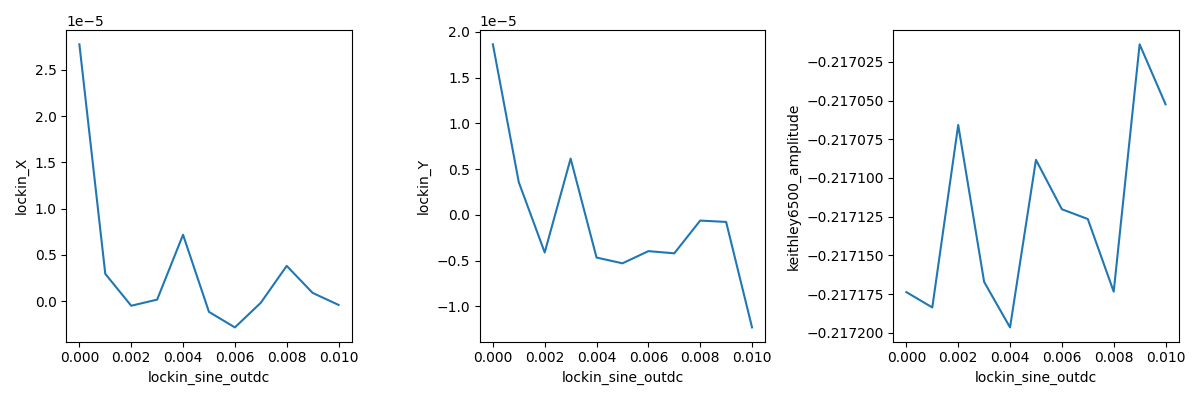

2025-02-27 10:03:24,401 [INFO] Completed in 0h 0m 8s
2025-02-27 10:03:24,401 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\data4term\10\data.tsv.gz


In [63]:
setpoints = np.linspace(START, STOP, SAMPLES)
res = s.sweep(li.sine_outdc, setpoints, delay=INT_TIME)

In [64]:
START = 0.01
STOP = -0.01
SAMPLES = 21
INT_TIME = 0.5

2025-02-27 10:03:24,438 [INFO] Starting sweep with ID 11
2025-02-27 10:03:24,439 [INFO] Minimum duration 0h 0m 10s


  0%|          | 0/21 [00:00<?, ?it/s]

2025-02-27 10:03:31,095 [WARNING] ID 11 INTERRUPTED


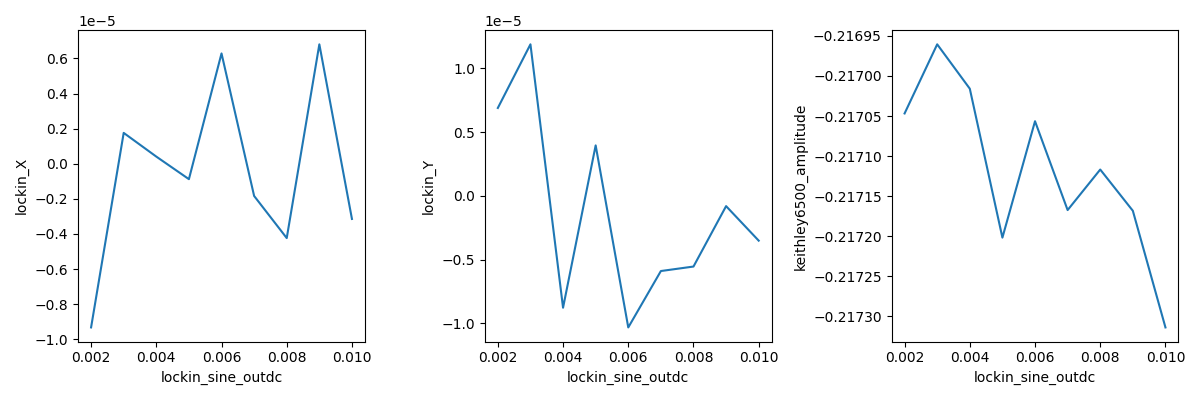

2025-02-27 10:03:31,403 [INFO] Completed in 0h 0m 6s
2025-02-27 10:03:31,403 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\data4term\11\data.tsv.gz


In [65]:
setpoints = np.linspace(START, STOP, SAMPLES)
res = s.sweep(li.sine_outdc, setpoints, delay=INT_TIME)

In [ ]:
START = -0.01
STOP = 0.01
SAMPLES = 21
INT_TIME = 1

2025-02-26 18:06:17,715 [INFO] Starting sweep with ID 2
2025-02-26 18:06:17,716 [INFO] Minimum duration 0h 0m 21s


  0%|          | 0/21 [00:00<?, ?it/s]

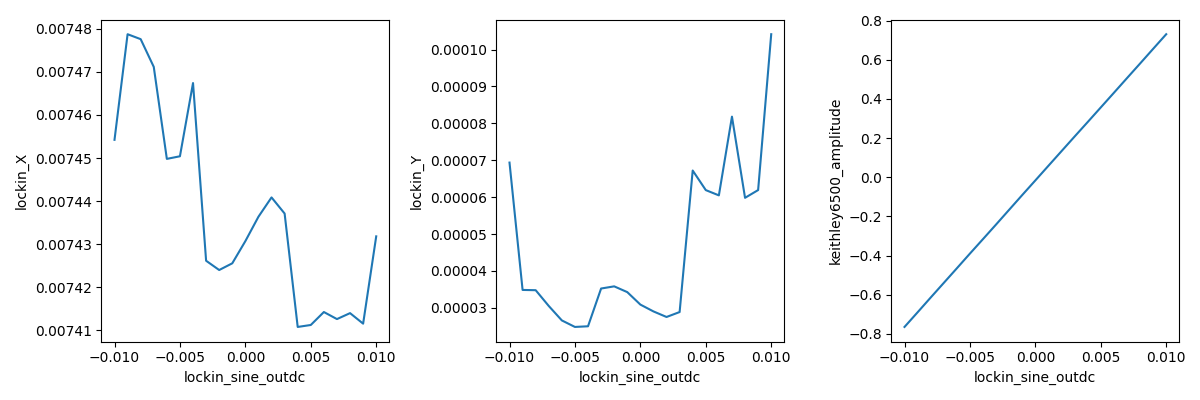

2025-02-26 18:06:44,229 [INFO] Completed in 0h 0m 26s
2025-02-26 18:06:44,231 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\data4term\2\data.tsv.gz


In [ ]:
setpoints = np.linspace(START, STOP, SAMPLES)
res = s.sweep(li.sine_outdc, setpoints, delay=INT_TIME)

2025-02-26 18:07:49,605 [INFO] Starting sweep with ID 3
2025-02-26 18:07:49,606 [INFO] Minimum duration 0h 0m 42s


  0%|          | 0/21 [00:00<?, ?it/s]

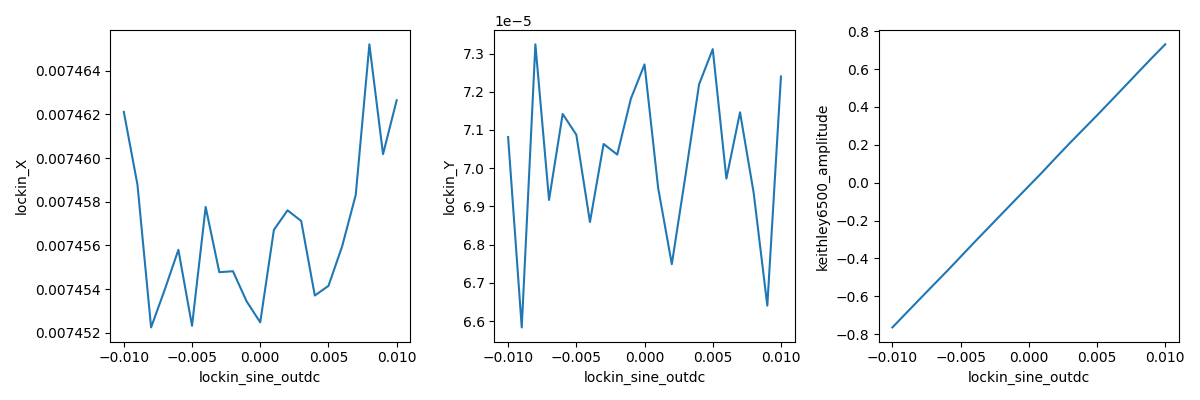

2025-02-26 18:08:37,154 [INFO] Completed in 0h 0m 47s
2025-02-26 18:08:37,155 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\data4term\3\data.tsv.gz


In [ ]:
START = 0.01
STOP = -0.01
SAMPLES = 21
INT_TIME = 2

setpoints = np.linspace(START, STOP, SAMPLES)
res = s.sweep(li.sine_outdc, setpoints, delay=INT_TIME)

2025-02-26 18:11:52,671 [INFO] Starting sweep with ID 4
2025-02-26 18:11:52,671 [INFO] Minimum duration 0h 0m 42s


  0%|          | 0/21 [00:00<?, ?it/s]

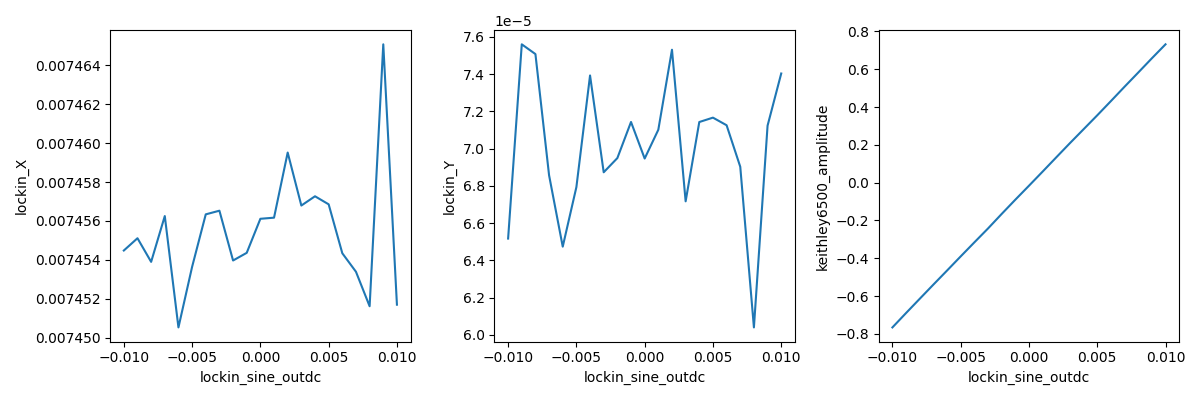

2025-02-26 18:12:40,310 [INFO] Completed in 0h 0m 47s
2025-02-26 18:12:40,310 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\data4term\4\data.tsv.gz


In [ ]:
START = -0.01
STOP = 0.01
SAMPLES = 21
INT_TIME = 2

setpoints = np.linspace(START, STOP, SAMPLES)
res = s.sweep(li.sine_outdc, setpoints, delay=INT_TIME)

2025-02-26 18:21:15,507 [INFO] Starting sweep with ID 5
2025-02-26 18:21:15,508 [INFO] Minimum duration 0h 0m 21s


  0%|          | 0/21 [00:00<?, ?it/s]

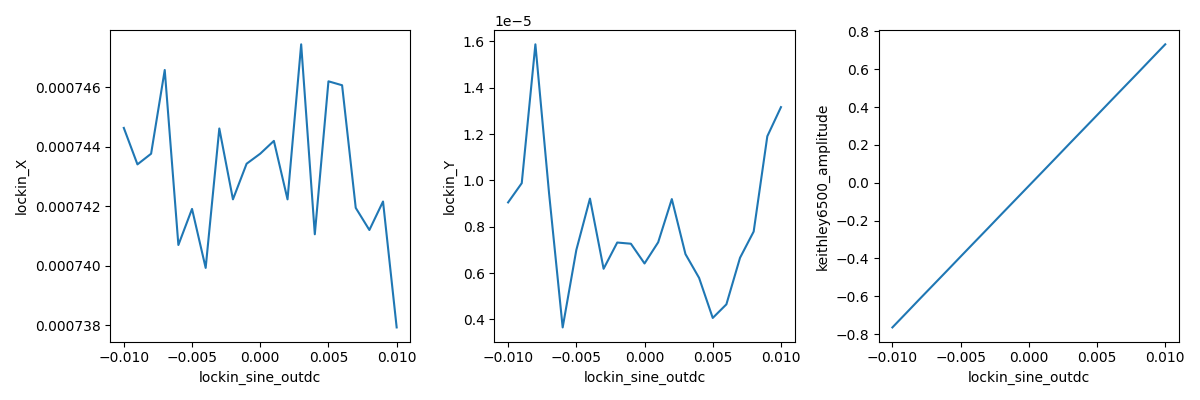

2025-02-26 18:21:42,523 [INFO] Completed in 0h 0m 26s
2025-02-26 18:21:42,523 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\data4term\5\data.tsv.gz


In [ ]:
START = 0.01
STOP = -0.01
SAMPLES = 21
INT_TIME = 1

setpoints = np.linspace(START, STOP, SAMPLES)
res = s.sweep(li.sine_outdc, setpoints, delay=INT_TIME)

2025-02-26 18:22:35,924 [INFO] Starting sweep with ID 6
2025-02-26 18:22:35,924 [INFO] Minimum duration 0h 0m 21s


  0%|          | 0/21 [00:00<?, ?it/s]

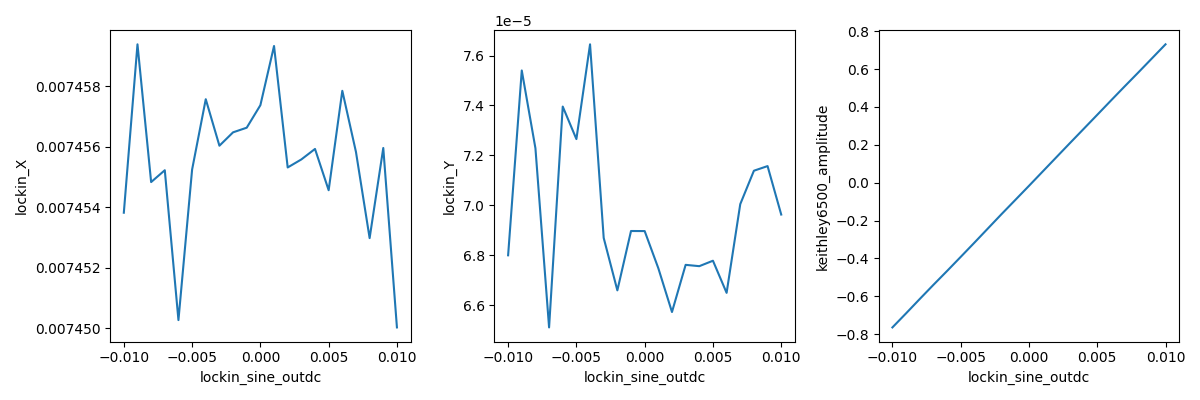

2025-02-26 18:23:02,939 [INFO] Completed in 0h 0m 26s
2025-02-26 18:23:02,939 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\data4term\6\data.tsv.gz


In [ ]:
START = -0.01
STOP = 0.01
SAMPLES = 21
INT_TIME = 1

setpoints = np.linspace(START, STOP, SAMPLES)
res = s.sweep(li.sine_outdc, setpoints, delay=INT_TIME)

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline  

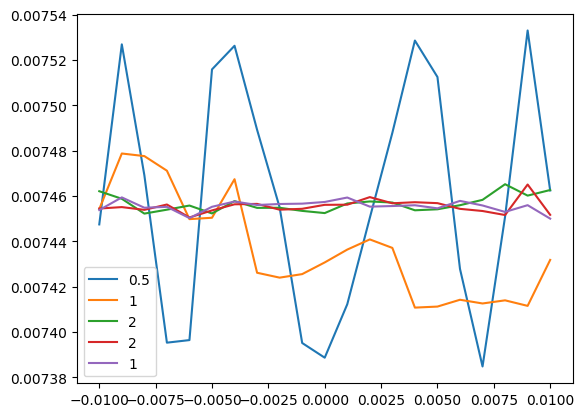

In [ ]:
int_times = [0.5, 1, 2, 2, 1, 1]
for i in range(1, 7):
    if i != 5:
        dat = pload1d(data4path, i)
        soutdc = dat[li.sine_outdc.full_name]
        lix = dat[li.X.full_name]
        plt.plot(soutdc, lix, label=f"{int_times[i - 1]}")
        plt.legend()

sticking with int_time of 1s with shorter time constant on lockin

## real device connected

In [52]:
# measurement config for analysis 
indep_params = [li.sine_outdc]
dep_params = [li.X, li.Y, keith6500.amplitude]

mc = {}
for param in indep_params + dep_params:
    mc[param.full_name] = param.label

s = sweep.Station(basedir=data4path, measurement_config=mc)
for param in indep_params + dep_params:
    s.fp(param)

s.add_comment("Ohmic Test on real device")

for dep in dep_params:
    s.plot(li.sine_outdc, dep)

In [49]:
START = 0
STOP = 0.01
SAMPLES = 11
INT_TIME = 1

setpoints = np.linspace(START, STOP, SAMPLES)
res = s.sweep(li.sine_outdc, setpoints, delay=INT_TIME)

2025-02-26 18:47:56,648 [INFO] Starting sweep with ID 7
2025-02-26 18:47:56,648 [INFO] Minimum duration 0h 0m 11s


  0%|          | 0/11 [00:00<?, ?it/s]

2025-02-26 18:48:08,798 [INFO] Completed in 0h 0m 12s
2025-02-26 18:48:08,798 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\data4term\7\data.tsv.gz


Text(0, 0.5, 'ka')

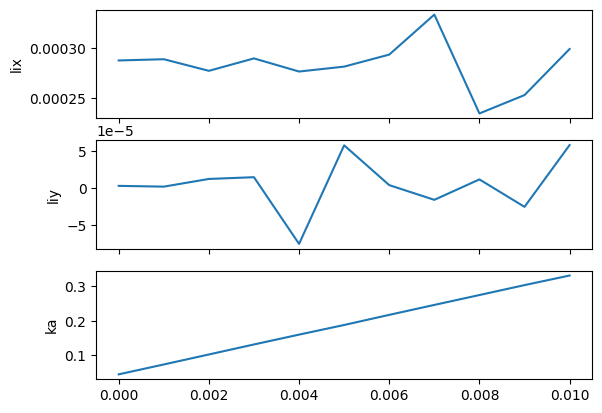

In [54]:
dat = pload1d(data4path, 7)
soutdc = dat[li.sine_outdc.full_name]
lix = dat[li.X.full_name]
liy = dat[li.Y.full_name]
ka = dat[keith6500.amplitude.full_name]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

ax1.plot(soutdc, lix)
ax1.set_ylabel('lix')

ax2.plot(soutdc, liy)
ax2.set_ylabel('liy')

ax3.plot(soutdc, ka)
ax3.set_ylabel('ka')

2025-02-26 18:50:34,113 [INFO] Starting sweep with ID 8
2025-02-26 18:50:34,113 [INFO] Minimum duration 0h 1m 41s


  0%|          | 0/101 [00:00<?, ?it/s]

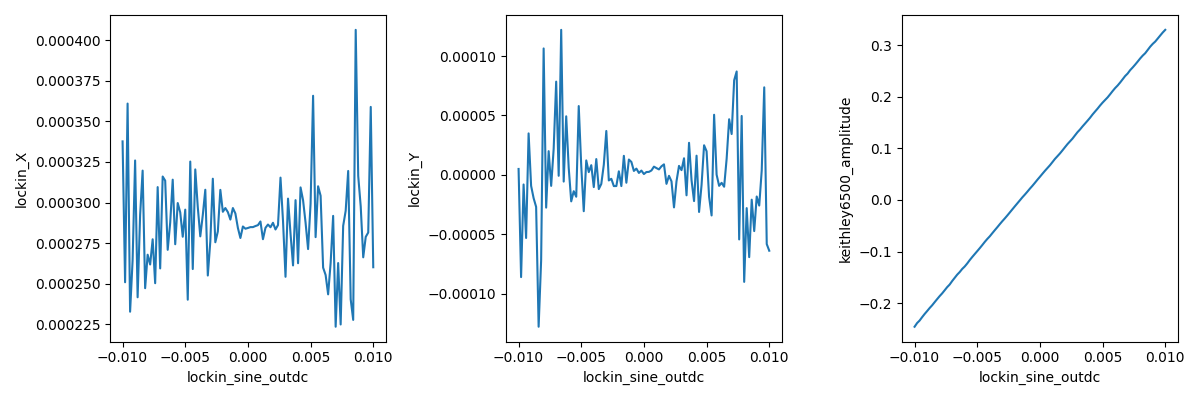

2025-02-26 18:52:21,927 [INFO] Completed in 0h 1m 47s
2025-02-26 18:52:21,928 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\data4term\8\data.tsv.gz


In [53]:
START = 0.01
STOP = -0.01
SAMPLES = 101
INT_TIME = 1

setpoints = np.linspace(START, STOP, SAMPLES)
res = s.sweep(li.sine_outdc, setpoints, delay=INT_TIME)

li ac set to 0, li sineoutdc set to -100mV

2025-02-26 19:00:56,707 [INFO] Starting sweep with ID 9
2025-02-26 19:00:56,708 [INFO] Minimum duration 0h 1m 41s


  0%|          | 0/101 [00:00<?, ?it/s]

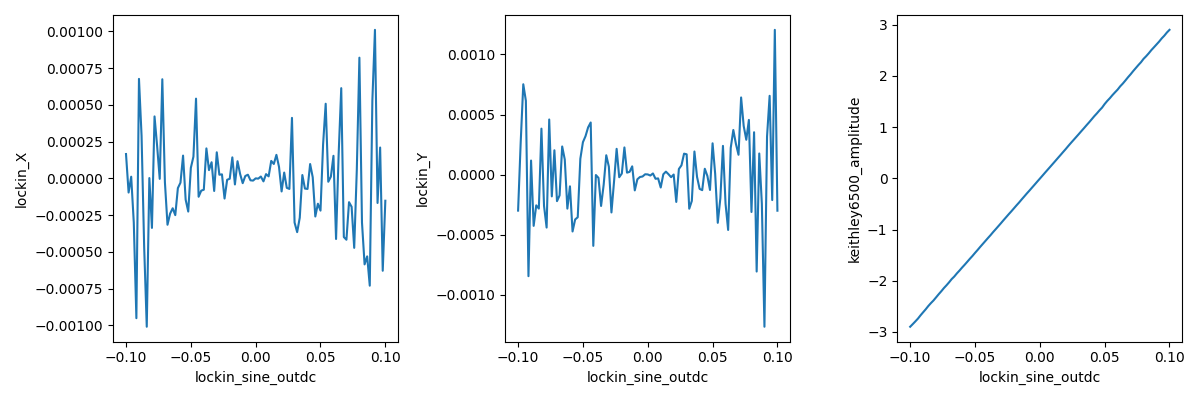

2025-02-26 19:03:03,464 [INFO] Completed in 0h 2m 6s
2025-02-26 19:03:03,464 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\data4term\9\data.tsv.gz


In [57]:
START = -0.1
STOP = 0.1
SAMPLES = 101
INT_TIME = 1

setpoints = np.linspace(START, STOP, SAMPLES)
res = s.sweep(li.sine_outdc, setpoints, delay=INT_TIME)

In [58]:
0.1/30e-6

3333.3333333333335

Shutting down system

In [59]:
paramp(li.sine_outdc)

# Feb 27

## keithley2400 setup

In [87]:
def ksetread(volt):
    keith2400.volt(volt)
    return keith2400.curr()

In [69]:
keith2400.print_readable_snapshot()

keithley2400:
	parameter  value
--------------------------------------------------------------------------------
IDN         :	{'vendor': 'KEITHLEY INSTRUMENTS INC.', 'model': '2400', 'seria...
compliancei :	0.000105 
compliancev :	21 
curr        :	-2.2219e-11 (A)
mode        :	VOLT 
nplci       :	1 
nplcv       :	1 
output      :	True 
rangei      :	1.05e-06 
rangev      :	21 
resistance  :	-0 (Ohm)
sense       :	"CURR:DC" 
timeout     :	10 (s)
volt        :	0 (V)


In [70]:
keith2400.volt(1)

In [73]:
keith2400.curr()

9.975807e-09

In [75]:
keith2400.volt(0)

In [76]:
keith2400.curr()

-1.961475e-11

In [78]:
keith2400.volt(0.01)
keith2400.curr()

-2.146778e-11

In [79]:
keith2400.volt(0)

In [80]:
k24v = keith2400.volt 
k24c = keith2400.curr

In [84]:
k24v(0.01)
k24c()

5.948759e-09

In [85]:
k24v(0)

In [88]:
k24v(0)
k24c()

1.052897e-10

In [74]:
1/100e6

1e-08